In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [3]:
pip install tensorflow

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ------------------------- -------------- 30.7/48.7 kB 1.3 MB/s eta 0:00:01
     ------------------------------- ------ 41.0/48.7 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 409.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.2/385.2 MB 4.1 MB/s eta 0:01:33
   ---------------------------------------- 0.3/385.2 MB 3.5 MB/s eta 0:01:51
   ---------------------------------------- 0.6/385.2 MB 4.6 MB/s eta 0:01:24
   ---------------------------------------- 0.6/385.2 MB 4.6 MB/s eta 0:01:24
   ---------------------------------------- 0.6/385.2 MB 4.6 MB/s eta 0:01:24
   ---------------------------------------- 0.6/385.2 MB 4.6 MB/s eta 0:01:24
   ---------------------------------------- 0.6/385.2 MB 4.6 MB/s eta 0:01:24
   ---------------------------------------- 0.6/385.2 MB 4.6 MB/s eta 0

In [5]:
#Loading the Data

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
Y_train.shape

(60000,)

Traimg data = 60,000 Images
Test data = 10,000 Images

In [8]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [9]:
print(X_train[10].shape)

(28, 28)


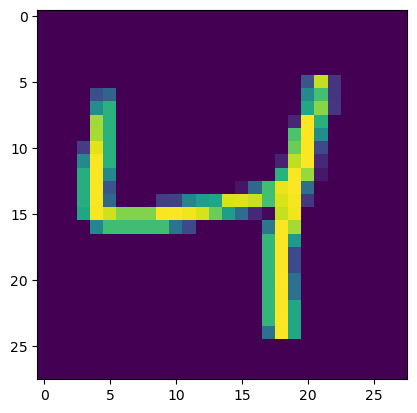

4


In [10]:
# Displaying the image and labels

plt.imshow(X_train[2])
plt.show()

# Print the corresponding label
print(Y_train[2])

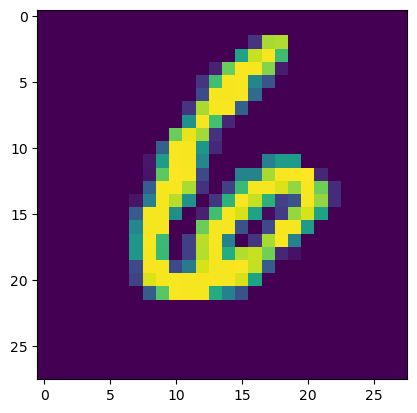

In [11]:
plt.imshow(X_train[13])
plt.show()

Image Lable

In [12]:
print(np.unique(Y_train))

print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


### We can use this labesls as such or we can also apply one heart encodong

##### All the images have same dimension if not, we have to resize all the images to a common images

In [13]:
#Scaling the values
X_train = X_train/255
X_test = X_test/255

In [14]:
print(X_train[5])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## Building The Neural Networks

In [15]:
# setting up the layers of the Neural Networks
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation= "relu"),
    keras.layers.Dense(50, activation= "relu"),
     keras.layers.Dense(10, activation= "sigmoid")                        
 ])
    


C:\Users\user\.anaconda\New folder\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
#Compiling the Nural Networks
model.compile(optimizer="adam",
              loss = "sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [17]:
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8552 - loss: 0.5077
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9578 - loss: 0.1448
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9686 - loss: 0.1047
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9757 - loss: 0.0822
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9790 - loss: 0.0690
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9832 - loss: 0.0572
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9856 - loss: 0.0494
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9876 - loss: 0.0424
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9892 - loss: 0.0376
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9893 - loss: 0.0346


#### The Training data accuracy is 99%

### Accuracy on test data:

In [18]:
loss,accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9602 - loss: 0.1551
0.9642000198364258


#### The Test data accuracy is 96.9%

In [19]:
print(X_test.shape)

(10000, 28, 28)


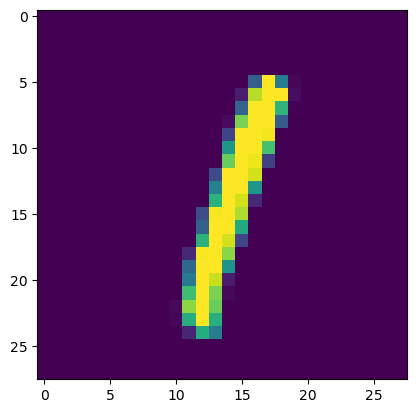

In [20]:
#first data point in x_test
plt.imshow(X_test[5])
plt.show()
           

In [21]:
print(Y_test[5])

1


In [22]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [23]:
print(Y_pred.shape)

(10000, 10)


In [24]:
print(Y_pred[5])

[1.42150981e-04 9.99978900e-01 2.82327533e-02 8.70967098e-03
 1.51965115e-02 1.98489244e-04 1.36749847e-02 9.81428623e-01
 2.42143348e-02 1.58306029e-05]


#### Model.preict() Gives the predictions probability of each class for that data point

In [25]:
# Converting the prediction probalility to class label
label_for_first_image = np.argmax(Y_pred[5])
print(label_for_first_image)

1


In [26]:
# Converting the prediction probabilitys to class label for all the data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 7, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

### Y_test --> True labels

Y_pred_label --> Predicted_label

### Confusion Matrix

In [27]:
conf_mtx = confusion_matrix(Y_test, Y_pred_labels)

In [28]:
print(conf_mtx)

tf.Tensor(
[[ 937    0    3    2   14    5    4    3    0   12]
 [   0 1110    2    7    0    0    3    3    8    2]
 [   1    0  985   22    2    0    5   10    6    1]
 [   0    0    2  995    2    2    0    5    3    1]
 [   0    0    7    0  967    1    4    1    0    2]
 [   1    2    0   43    3  828    6    1    7    1]
 [   3    2    3    1    7    8  931    0    3    0]
 [   2    1    9    8    1    1    0  997    2    7]
 [   2    0    2   25    9    7    4    5  913    7]
 [   2    1    0   10   21    3    0    9    4  959]], shape=(10, 10), dtype=int32)


Text(0.5, 25.722222222222214, 'predicted Labels')

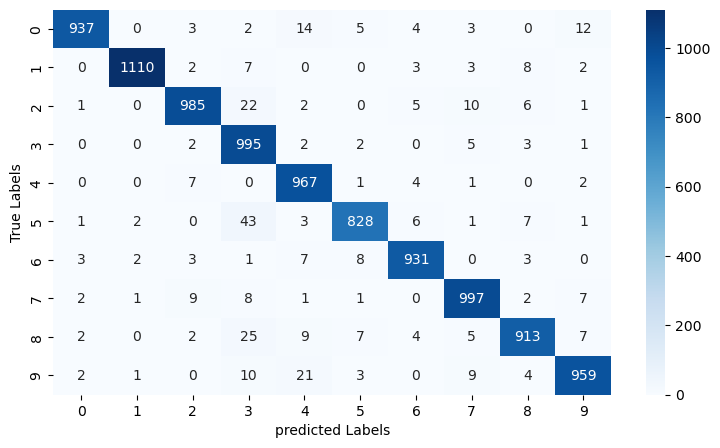

In [29]:
plt.figure(figsize=(9,5))
sns.heatmap(conf_mtx, annot=True, fmt="d", cmap="Blues")
plt.ylabel("True Labels")
plt.xlabel("predicted Labels")

In [30]:
image=r"C:\Users\user\Downloads\download (2).png"
input_image = cv2.imread(image)


In [31]:
type(input_image)

numpy.ndarray

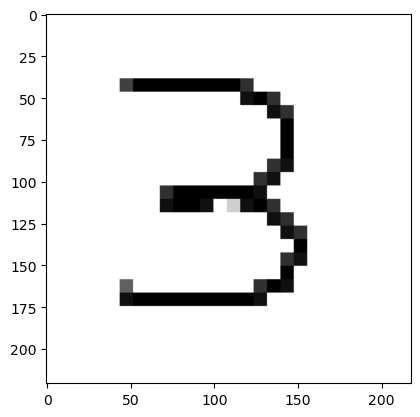

In [32]:
plt.imshow(input_image)

In [33]:
input_image.shape

(221, 218, 3)

In [34]:
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [35]:
grayscale.shape

(221, 218)

In [36]:
input_image_resize = cv2.resize(grayscale,(28,28))

In [37]:
input_image_resize.shape

(28, 28)

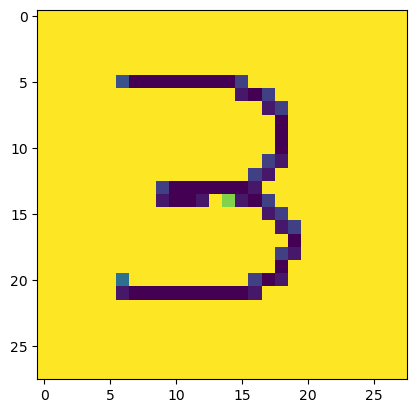

In [38]:
plt.imshow(input_image_resize)

In [39]:
input_image_resize = input_image_resize/255

In [40]:
image_reshape = np.reshape(input_image_resize,[1,28,28])

In [41]:
input_pred = model.predict(image_reshape)
print(input_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[2.4463367e-09 1.7655952e-25 4.5042798e-02 9.9999994e-01 1.0690573e-36
  3.1943423e-01 2.3113490e-08 4.9642613e-03 9.9999940e-01 5.6161999e-04]]


In [42]:
input_pred_label = np.argmax(input_pred)

In [43]:
print(input_pred_label)

3
